In [1]:
!curl -L "https://public.roboflow.ai/ds/WKkUorQ71T?key=wIBAdyawPa" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: export/images/armas (693)_jpg.rf.539e7f818abfba8b13efc60c3eaa4b09.jpg  
 extracting: export/images/armas (1623)_jpg.rf.54322b09fff9789a2617f07a19f8f531.jpg  
 extracting: export/images/armas (772)_jpg.rf.5335483aeff9c87fd46a3a12e5a75f4d.jpg  
 extracting: export/images/armas (1101)_jpg.rf.53cb10cc7705158adb60227aa482711d.jpg  
 extracting: export/images/armas (623)_jpg.rf.53ee22796f191ca0eaf6124f4e133f5f.jpg  
 extracting: export/images/armas (2278)_jpg.rf.535d90355a01edf613c11d1d6168de3e.jpg  
 extracting: export/images/armas (2254)_jpg.rf.5451063a5496a056897d719fb4ccdc83.jpg  
 extracting: export/images/armas (1306)_jpg.rf.549461e692756d4a158af908e7eb8843.jpg  
 extracting: export/images/armas (2797)_jpg.rf.5518ea2e6baa681a051807d54dae5d9d.jpg  
 extracting: export/images/armas (1947)_jpg.rf.54cd92bf56c54ddc500de583356367a2.jpg  
 extracting: export/images/armas (304)_jpg.rf.54d3beb055395743c1d0df76e3214b6f.jpg  
 extracting: export/im

In [1]:
!unzip -qq "/content/yolov5+dataset.zip"

In [ ]:
!unzip -qq "/content/pistol.zip"

In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 10562, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10562 (delta 2), reused 5 (delta 1), pack-reused 10554
Receiving objects: 100% (10562/10562), 10.75 MiB | 32.87 MiB/s, done.
Resolving deltas: 100% (7293/7293), done.


In [10]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 596 kB 5.1 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [11]:
%cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pistol']

In [12]:
%cd /
from glob import glob

img_list = glob('/content/dataset/export/images/*.jpg')

print(len(img_list))

/
2971


In [13]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

print(len(train_img_list), len(val_img_list))

2376 595


In [14]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [18]:
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.load(f)

print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 1, 'names': ['pistol']}
{'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'nc': 1, 'names': ['pistol']}


In [9]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name gun_yolov5s_results

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=gun_yolov5s_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-193-gdb1f83b torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=

In [20]:
!ls /content/yolov5/runs/train/gun_yolov5s_results/


confusion_matrix.png				   results.png
events.out.tfevents.1642488294.02133c3eef1d.206.0  train_batch0.jpg
F1_curve.png					   train_batch1.jpg
hyp.yaml					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
opt.yaml					   val_batch1_labels.jpg
P_curve.png					   val_batch1_pred.jpg
PR_curve.png					   val_batch2_labels.jpg
R_curve.png					   val_batch2_pred.jpg
results.csv					   weights


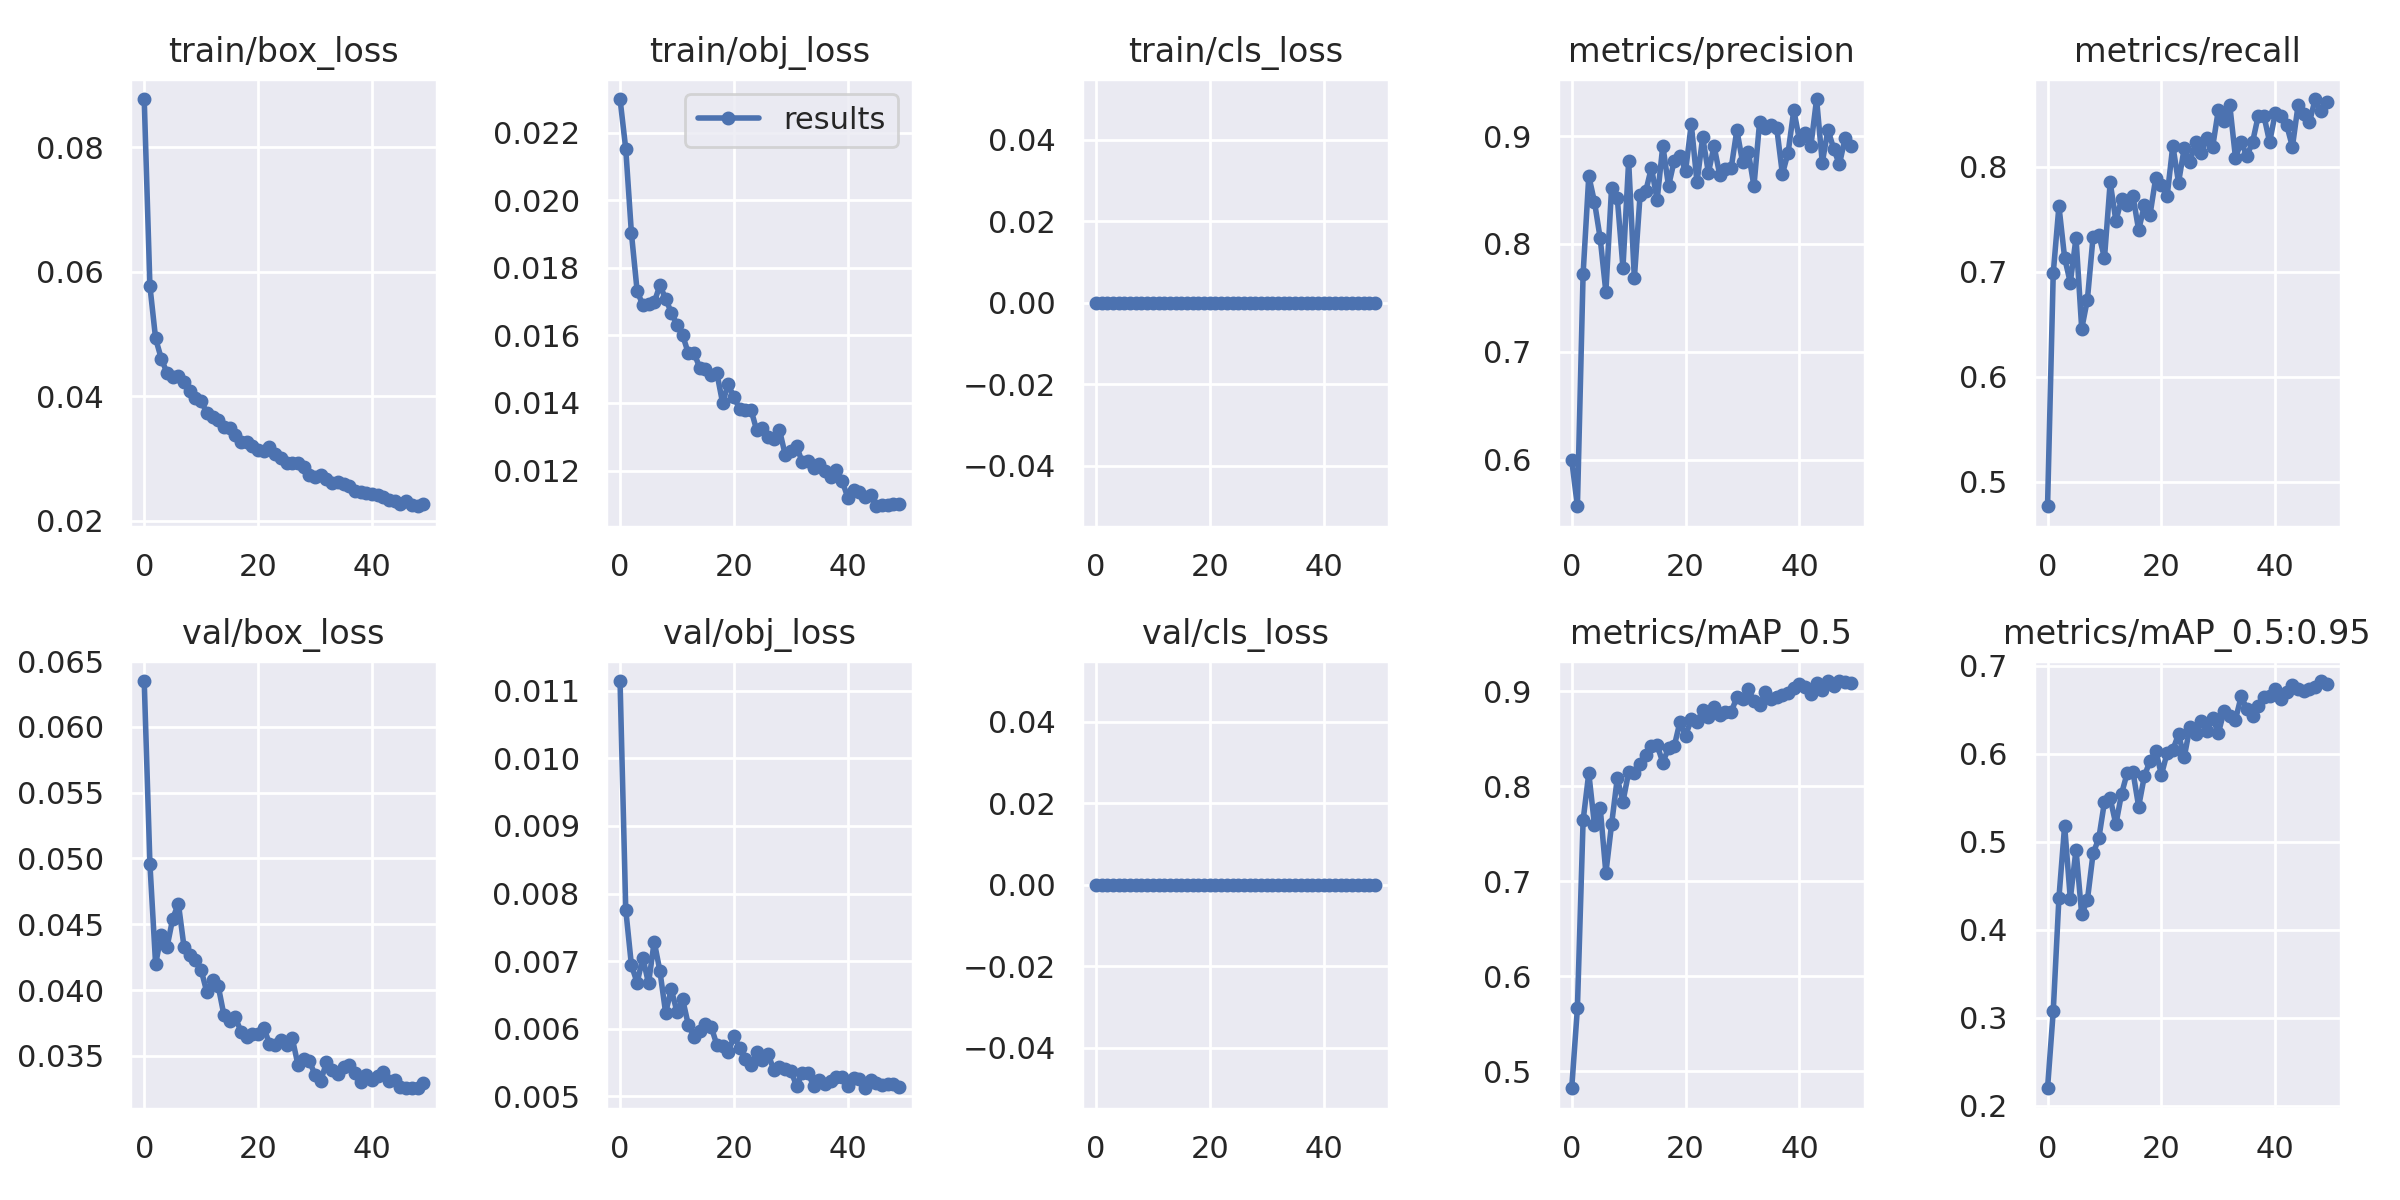

In [21]:
from IPython.display import Image
Image(filename= '/content/yolov5/runs/train/gun_yolov5s_results/results.png',width=1000)

Train 데이터

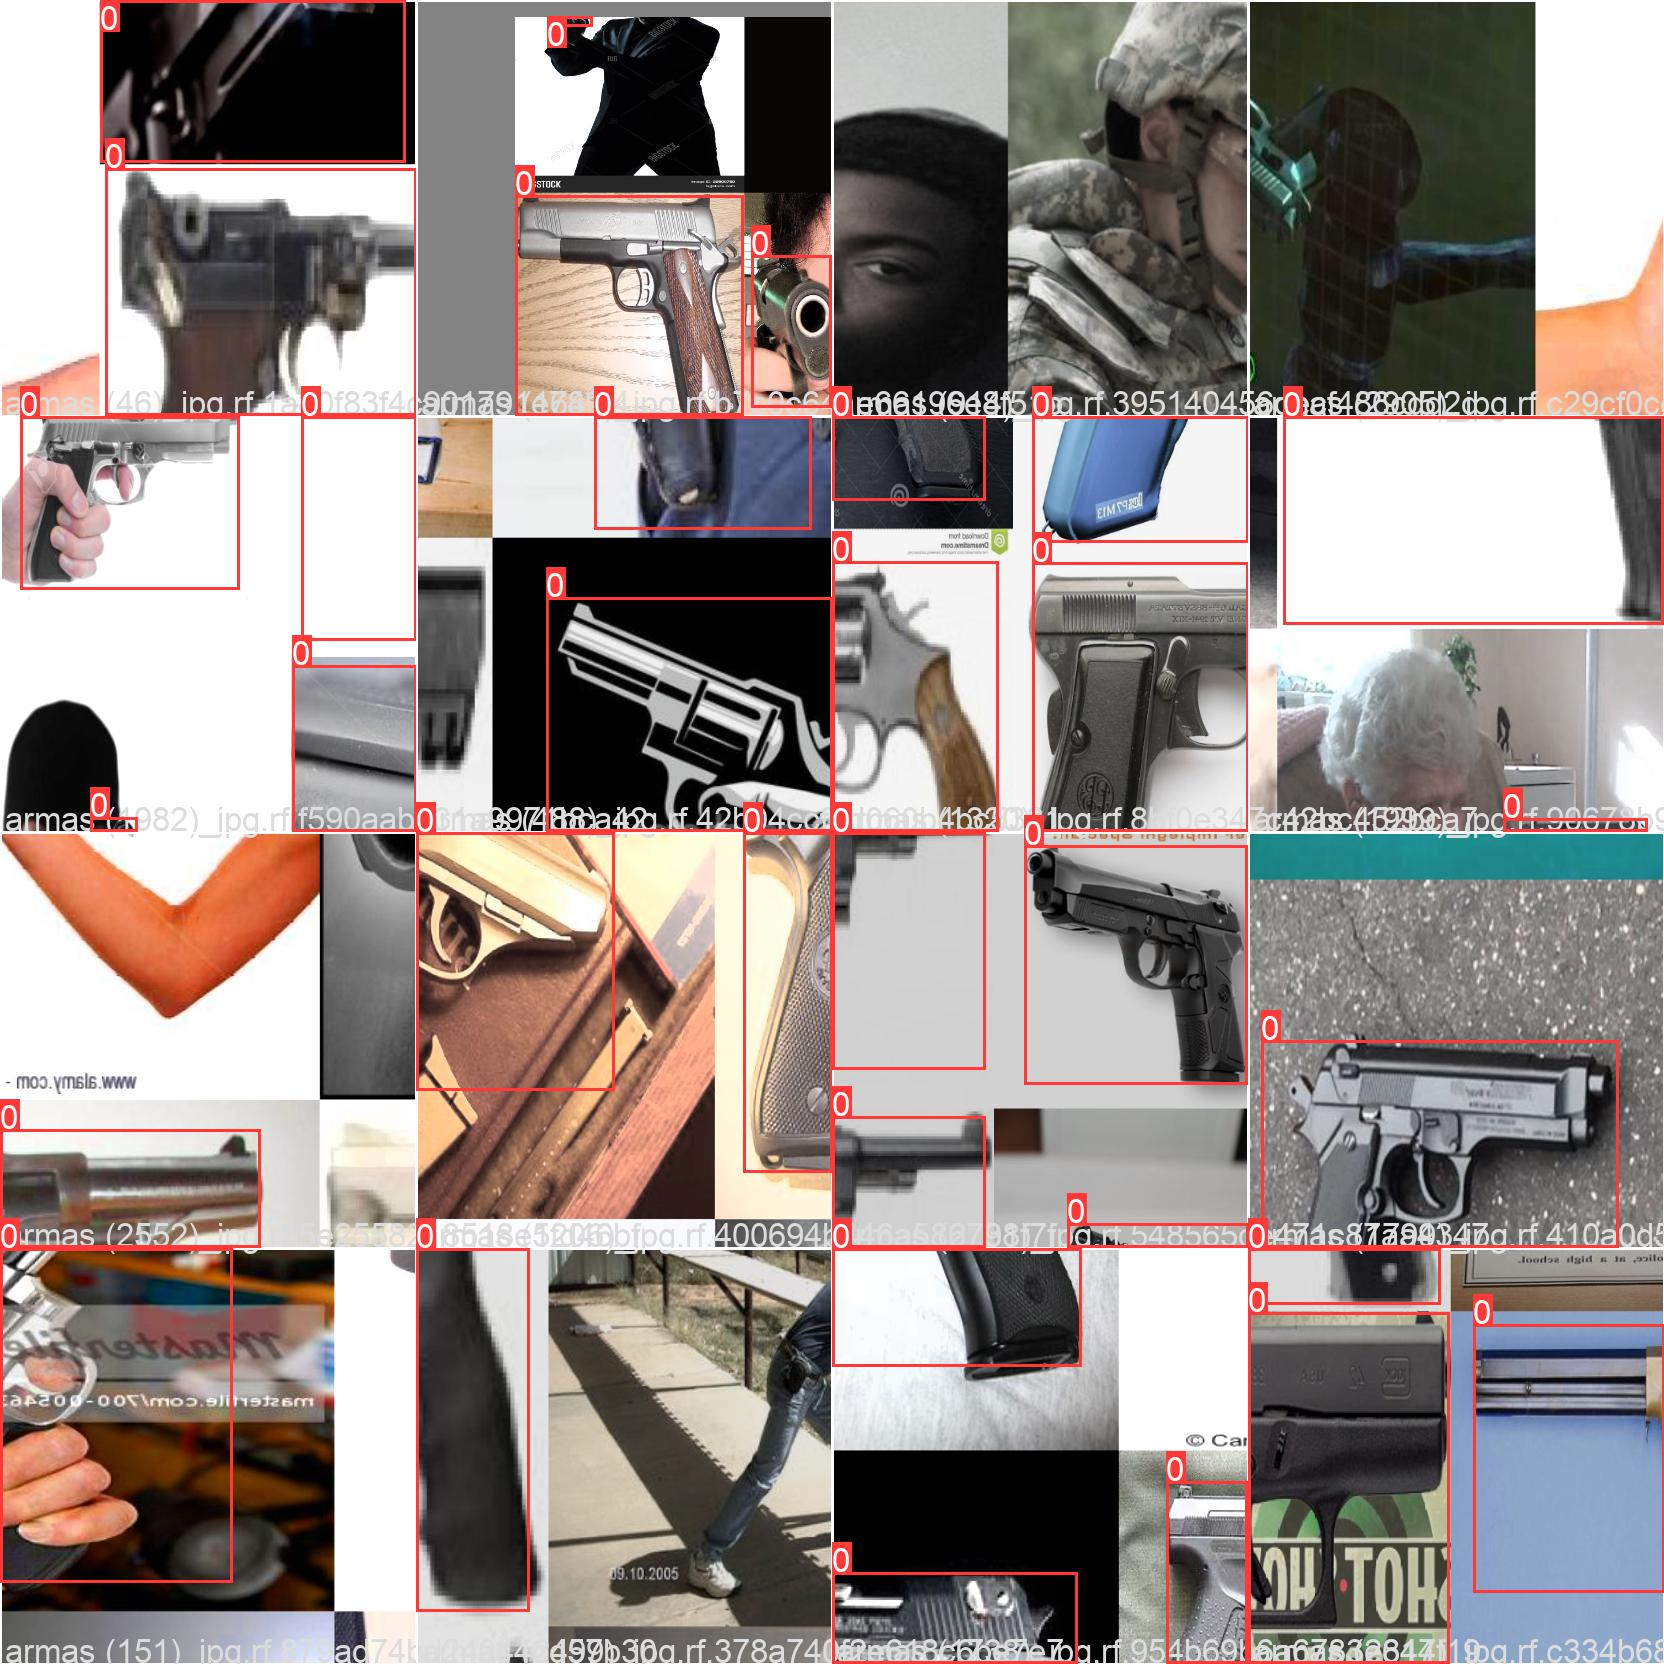

In [ ]:
Image(filename= '/content/yolov5/runs/train/gun_yolov5s_results/train_batch0.jpg',width=1000)

검증

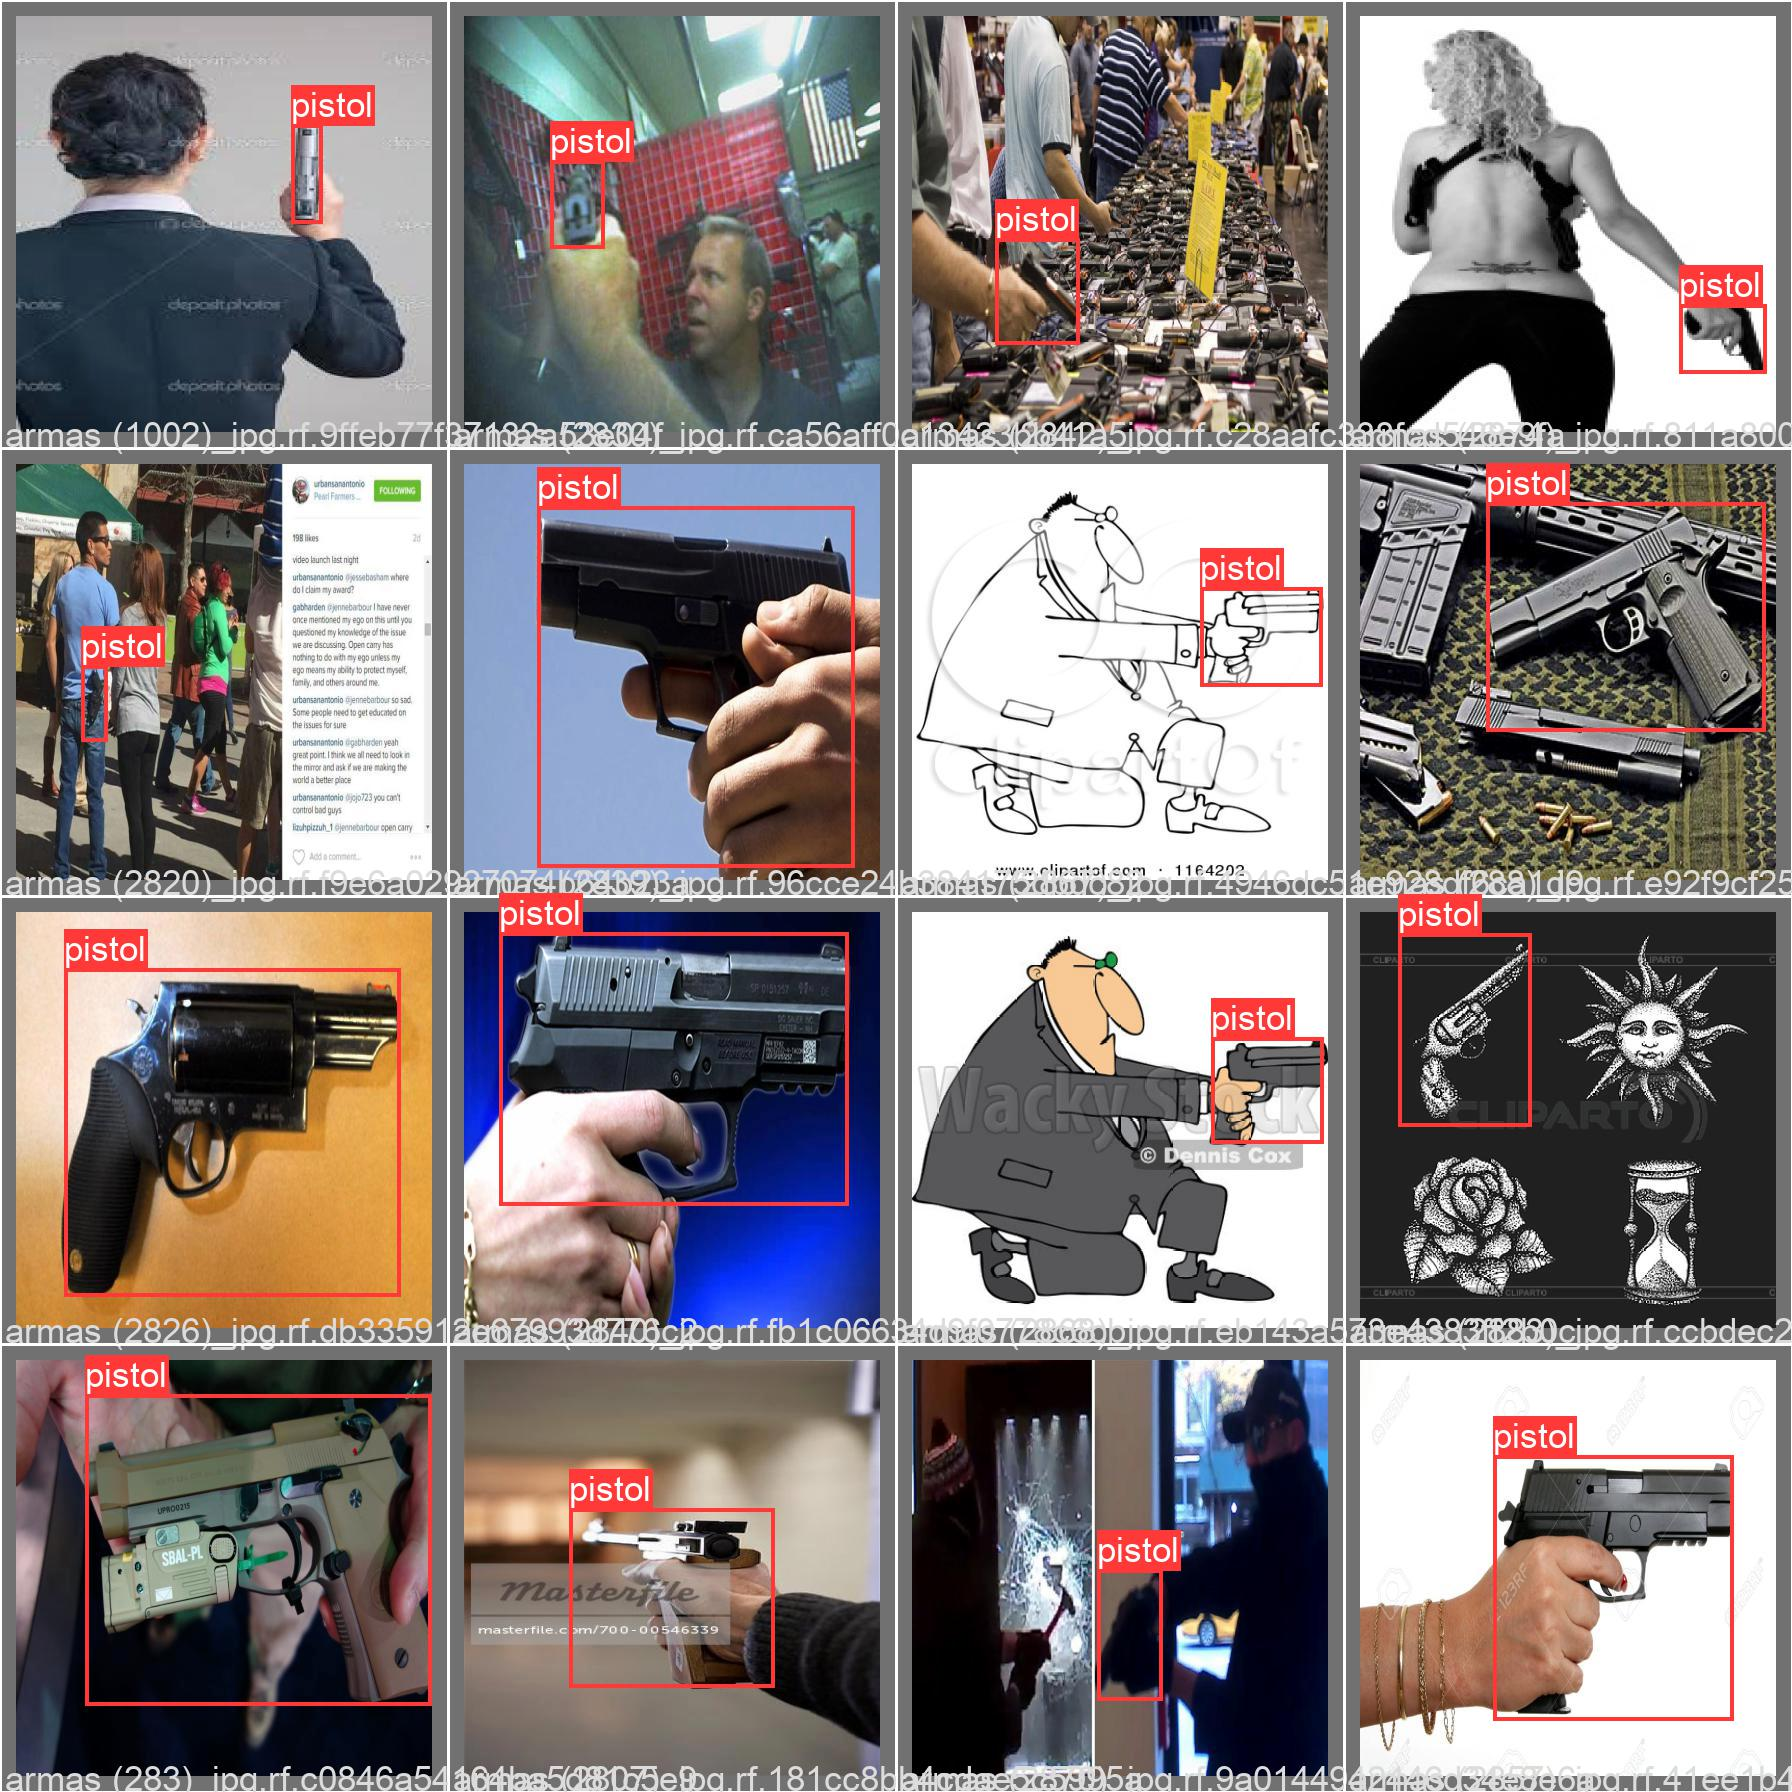

In [ ]:
Image(filename= '/content/yolov5/runs/train/gun_yolov5s_results/val_batch0_labels.jpg',width=1000)

In [ ]:
%ls runs/train/gun_yolov5s_results/weights

best.pt  last.pt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%mkdir /content/drive/My\ Drive/colabYolo
%cp /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt /content/drive/My\ Drive/colabYolo

mkdir: cannot create directory ‘/content/drive/My Drive/colabYolo’: File exists
cp: -r not specified; omitting directory '/content/dataset/'


In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/

In [27]:
%cd /content/yolov5/
!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"

/content/yolov5
detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'], source=/content/dataset/export/images/armas (2413)_jpg.rf.1f984154e77e1c0562dcc4f6b4890953.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-1-10 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/export/images/armas (2413)_jpg.rf.1f984154e77e1c0562dcc4f6b4890953.jpg: 416x416 1 pistol, Done. (0.014s)
Speed: 0.4ms pre-process, 13.7ms inference, 67.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


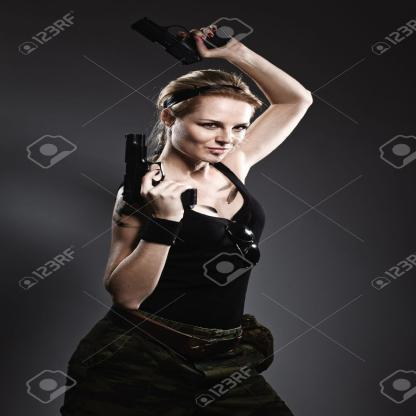

In [24]:
import glob
import random
from IPython.display import Image

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

In [28]:
from IPython.display import Image
import os

val_img_path = val_img_list[110]

!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"

Image(os.path.join('/content/yolov5/inference/output', os.path.basename(val_img_path)))

detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'], source=/content/dataset/export/images/armas (2971)_jpg.rf.60099ad19df8f43f96f6fb33953a5f59.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-1-10 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/export/images/armas (2971)_jpg.rf.60099ad19df8f43f96f6fb33953a5f59.jpg: 416x416 1 pistol, Done. (0.014s)
Speed: 0.5ms pre-process, 13.6ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp2


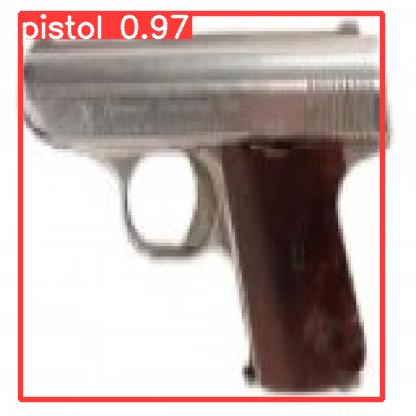

In [22]:
Image(os.path.join('runs/detect/exp4', os.path.basename(val_img_path)))

In [28]:
!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source "/content/30 Bore Pistol Firing  _ 30 Bore Pistol 20 Shot.mp4"

detect: weights=['/content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt'], source=/content/30 Bore Pistol Firing  _ 30 Bore Pistol 20 Shot.mp4, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-193-gdb1f83b torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/3473) /content/30 Bore Pistol Firing  _ 30 Bore Pistol 20 Shot.mp4: 256x416 Done. (0.017s)
video 1/1 (2/3473) /content/30 Bore Pistol Firing  _ 30 Bore Pistol 20 Shot.mp4: 256x416 Done. (0.012s)
video 1/1 (3/3473) /content/30 Bore Pistol Firing  _ 30 Bore Pistol 20 Shot.mp4: 256x416 Done.